In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

data = pd.read_csv("movie_metadata.csv")
print(len(data))
print(data.dtypes)
data.shape

5043
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 floa

(5043, 28)

Data desciption: Our initial data have 5043 row with 28 columns with types described as above.

I. Cleaning data:
    1. Remove duplicates:

In [2]:
data.drop_duplicates(keep='first', inplace = True)
data = data.reset_index(drop=True)
len(data)

4998

There are 45 duplicate row that are removed from the dataset. The new data contains 4998 entries,    

  2. Separte movie genres:
This column contains genres of movie. A movie can be tagged with different genres, therefore, we need to process the data in this column first.

In [3]:
data["genres"].head()

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
4                        Documentary
Name: genres, dtype: object

In [4]:
list_genres = []
for cell in data["genres"]:
    list_genres+=cell.split("|")
genres_count = Counter(list_genres)
print(len(genres_count))
genres_count

26


Counter({'Action': 1143,
         'Adventure': 914,
         'Fantasy': 604,
         'Sci-Fi': 611,
         'Thriller': 1396,
         'Documentary': 121,
         'Romance': 1098,
         'Animation': 242,
         'Comedy': 1862,
         'Family': 544,
         'Musical': 132,
         'Mystery': 493,
         'Western': 94,
         'Drama': 2571,
         'History': 205,
         'Sport': 181,
         'Crime': 883,
         'Horror': 556,
         'War': 211,
         'Biography': 292,
         'Music': 212,
         'Game-Show': 1,
         'Reality-TV': 2,
         'News': 3,
         'Short': 5,
         'Film-Noir': 6})

Based on the result, we have total of 26 movie genres in this dataset. However, we need to combine "Music" and "Musical" into one genre. We also remove "Reality-TV", "Game-Show" and "News" as they are not really a catergory of movie.

In [5]:
genres_count["Music"] = genres_count["Music"] + genres_count["Musical"]
removal_list = ["Musical", "Reality-TV","Game-Show","News"]
for key in removal_list:
    genres_count.pop(key)
print(len(genres_count))
genres_count

22


Counter({'Action': 1143,
         'Adventure': 914,
         'Fantasy': 604,
         'Sci-Fi': 611,
         'Thriller': 1396,
         'Documentary': 121,
         'Romance': 1098,
         'Animation': 242,
         'Comedy': 1862,
         'Family': 544,
         'Mystery': 493,
         'Western': 94,
         'Drama': 2571,
         'History': 205,
         'Sport': 181,
         'Crime': 883,
         'Horror': 556,
         'War': 211,
         'Biography': 292,
         'Music': 344,
         'Short': 5,
         'Film-Noir': 6})

We now have 22 genres. Let's plot mean IMDB score of each genre.

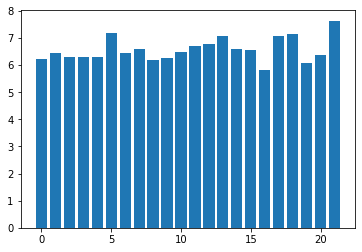

In [6]:
genres_imdb = {}
for genre in genres_count.keys():
    score = 0
    for i in range(len(data)):
        if genre in data["genres"][i]:
            score += data["imdb_score"][i]
            
    genres_imdb[genre] =score
genres_mean = {}    
for genre in genres_count.keys():    
    genres_mean[genre] = genres_imdb[genre]/genres_count[genre]

plt.bar(range(len(genres_mean)), genres_mean.values(), align='center')
plt.show()

There is not much difference between genres. Almost all the mean are in range of 6 - 8. Therefore, the genres column can be removed from the dataframe as it does not relate to the IMDB score.

In [7]:
data = data.drop(["genres"], axis = 1)
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4949.000000,4983.000000,4895.000000,4975.000000,4991.000000,4.124000e+03,4.998000e+03,4998.000000,4985.000000,4977.000000,4.511000e+03,4891.000000,4985.000000,4998.000000,4671.000000,4998.000000
mean,139.890079,107.213325,688.679060,639.900905,6556.939892,4.832565e+07,8.347020e+04,9676.941176,1.368907,272.014667,3.974787e+07,2002.468820,1642.998796,6.441056,2.221417,7487.430172
std,121.477586,25.248775,2821.649616,1643.298282,15061.586700,6.796483e+07,1.380866e+05,18165.404578,2.014623,377.776210,2.069689e+08,12.475235,4030.925303,1.124107,1.391185,19290.726563
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,611.500000,5.304835e+06,8.560000e+03,1405.500000,0.000000,64.000000,6.000000e+06,1999.000000,280.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,369.000000,984.000000,2.544575e+07,3.426050e+04,3085.500000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,162.500000
75%,195.000000,118.000000,192.000000,635.000000,11000.000000,6.231942e+07,9.612075e+04,13740.500000,2.000000,324.000000,4.500000e+07,2011.000000,917.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


    3. Missing value:
As in above table, the number of value count for each column are not the same, which indicates that there are several rows those are missing some of value we have to handle.

In [8]:
data.isnull().sum(axis = 0).sort_values(ascending=False)

gross                        874
budget                       487
aspect_ratio                 327
content_rating               301
plot_keywords                152
title_year                   107
director_name                103
director_facebook_likes      103
num_critic_for_reviews        49
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

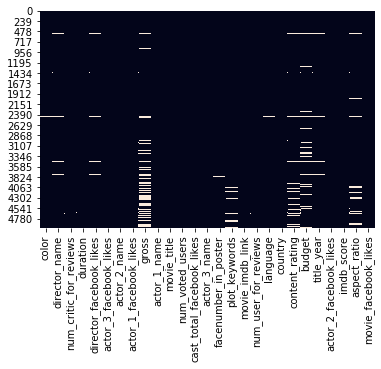

In [9]:
sns.heatmap(data.isnull(), cbar=False)

As we can see, "budget" and "gross" are columns with the most number of missing value. However, we can't either remove these two columns due the logically relation with the IMDB score or replace the missing values with mean of column. Therefore, the best solution is to remove rows with missing value.

In [10]:
data = data.dropna(subset = ["budget", "gross"]).reset_index(drop = True)
print(len(data))

3857


The dataset has 3857 entries which is 77% of initial dataset. Let's take a look at other columns with missing values

In [11]:
data.isnull().sum(axis = 0).sort_values(ascending=False)

aspect_ratio                 74
content_rating               51
plot_keywords                31
actor_3_name                 10
actor_3_facebook_likes       10
facenumber_in_poster          6
actor_2_facebook_likes        5
actor_2_name                  5
actor_1_facebook_likes        3
actor_1_name                  3
language                      3
color                         2
duration                      1
num_critic_for_reviews        1
movie_imdb_link               0
num_user_for_reviews          0
cast_total_facebook_likes     0
num_voted_users               0
movie_title                   0
country                       0
gross                         0
budget                        0
title_year                    0
imdb_score                    0
director_facebook_likes       0
director_name                 0
movie_facebook_likes          0
dtype: int64

Before trying to impute the missing values, we want to measure how important three variables: aspect_ratio, content_rating, and plot_keywords which have the most missing value in the current dataset.

In [12]:
print(Counter(data["aspect_ratio"]))

Counter({2.35: 1995, 1.85: 1600, 1.37: 50, 1.78: 41, 1.66: 40, 1.33: 19, 2.39: 11, 2.2: 10, 2.0: 3, 2.4: 3, 2.76: 3, 1.75: 2, 2.24: 1, 1.5: 1, 1.77: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 1.18: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 2.55: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 16.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


the most common ratio are 2.35 and 1.85. To measure the importance of this variable, we will divide this variable into 3 groups:
- group 1 is 2.35
- group 2 is 1.85
- group 0 is other ratio

First we will replace missing value with 0 and then we will calculate the mean of IMDB score for each group.

In [13]:
#create a copy dataframe with only "aspect_ratio" and "imdb_score" for evaluation
temp_data = data[["aspect_ratio", "imdb_score"]].copy()
#fill n/a value, catergorize into 3 groups and calculate mean of each group
temp_data.loc[:,"aspect_ratio"] = temp_data.loc[:,"aspect_ratio"].fillna(0)
temp_data.loc[:,"aspect_ratio"] = temp_data.loc[:,"aspect_ratio"].replace({2.35:1,1.85:2})
temp_data.loc[:,"aspect_ratio"] = temp_data.loc[:,"aspect_ratio"].apply(lambda x: 0 if x!=1 and x != 2 else x)
temp_data.groupby("aspect_ratio").mean()

,imdb_score
aspect_ratio,
0.0,6.675290
1.0,6.508471
2.0,6.374049


There is no significant different between these groups, therefore removing this variable won't affect the further analyzes

In [14]:
data = data.drop(["aspect_ratio"], axis = 1)

We further remove "plot_keywords" columns as it is considered as not related to the IMDB score analyze due to its diveristy.

In [15]:
data = data.drop(["plot_keywords"], axis = 1)

The last column with many missing values is "content_rating". We will examize its data

In [16]:
Counter(data["content_rating"])

Counter({'PG-13': 1314,
         'PG': 573,
         'G': 91,
         'R': 1723,
         'Approved': 17,
         'NC-17': 6,
         nan: 51,
         'X': 10,
         'Not Rated': 42,
         'Unrated': 24,
         'M': 2,
         'GP': 1,
         'Passed': 3})

According to the rating system nowadays, it includes 5 ratings: PG-13, PG, NC-17, G, R. Therefore, we need to replace some old ratings with the new ones as following:
- M = GP = PG
- X = NC-17
- other ungrouped ratings such as: “Approved”, “Not Rated”, “Passed”, “Unrated” will be grouped as R
- There is no suitable replacement for missing value for this column, therefore these rows will be remove from the dataset

In [17]:
#Remove rows with missing values
data = data.dropna(subset = ["content_rating"]).reset_index(drop = True)
print(len(data))

3806


We dropped 51 rows

In [18]:
data["content_rating"] = data["content_rating"].replace({"M":"PG","GP":"PG", 
                                                         "X":"NC-17",
                                                         "Approved":"R","Not Rated":"R","Passed":"R", "Unrated":"R"})
Counter(data["content_rating"])

Counter({'PG-13': 1314, 'PG': 576, 'G': 91, 'R': 1809, 'NC-17': 16})

We have only 5 rating now. Let's replace them with numerical values:
- PG-13: 0
- PG: 1
- G: 2
- R: 3
- NC-17: 4

In [19]:
data["content_rating"] = data["content_rating"].replace({"PG-13": 0,"PG": 1,"G": 2,"R": 3,"NC-17": 4})

    4. Removing unrelated columns
Is "Color" column relates to the IDMB score?

In [20]:
Counter(data["color"])

Counter({'Color': 3680, ' Black and White': 124, nan: 2})

96% of this column is color which indicates that this variable is nearly constant. Therefore, removing it will not affect the analyzing result.

In [21]:
data = data.drop(["color"], axis = 1)

Other columns with diverve values those are not useful for IDMB classification such as: "movie_title", "director_name", "actor_1_name", "actor_2_name", "actor_3_name" and "movie_imdb_link" will be removed from the dataset.

In [22]:
print(f'number of unique director name: {data["director_name"].nunique()}')
print(f'number of unique actor 1 name: {data["actor_1_name"].nunique()}')
print(f'number of unique actor 2 name: {data["actor_2_name"].nunique()}')
print(f'number of unique actor 3 name: {data["actor_3_name"].nunique()}')

number of unique director name: 1709
number of unique actor 1 name: 1473
number of unique actor 2 name: 2246
number of unique actor 3 name: 2646


In [23]:
data = data.drop(["movie_title","director_name", "actor_1_name", "actor_2_name", "actor_3_name", "movie_imdb_link"], axis = 1)

We next examine the columns "language" and "country":

In [24]:
print(Counter(data["language"]))

Counter({'English': 3644, 'French': 34, 'Spanish': 24, 'Mandarin': 14, 'German': 11, 'Japanese': 10, 'Cantonese': 7, 'Italian': 7, 'Korean': 5, 'Hindi': 5, 'Portuguese': 5, 'Norwegian': 4, 'Dutch': 3, 'Thai': 3, 'Danish': 3, 'Persian': 3, 'Aboriginal': 2, 'Dari': 2, nan: 2, 'Hebrew': 2, 'Indonesian': 2, 'Filipino': 1, 'Maya': 1, 'Kazakh': 1, 'Aramaic': 1, 'Mongolian': 1, 'Bosnian': 1, 'Hungarian': 1, 'Czech': 1, 'Russian': 1, 'None': 1, 'Zulu': 1, 'Arabic': 1, 'Vietnamese': 1, 'Romanian': 1})


95% of movie are in English, therefore, this variable is nearly constant. Let's remove it.

In [25]:
data = data.drop(["language"], axis = 1)

In [26]:
print(Counter(data["country"]).most_common())

[('USA', 3025), ('UK', 316), ('France', 103), ('Germany', 79), ('Canada', 63), ('Australia', 40), ('Spain', 22), ('Japan', 15), ('China', 13), ('Hong Kong', 13), ('New Zealand', 11), ('Italy', 11), ('Mexico', 10), ('Denmark', 9), ('South Korea', 8), ('Ireland', 7), ('India', 5), ('Brazil', 5), ('Thailand', 4), ('Iran', 4), ('Norway', 4), ('Czech Republic', 3), ('South Africa', 3), ('Netherlands', 3), ('Russia', 3), ('Argentina', 3), ('Romania', 2), ('Hungary', 2), ('Taiwan', 2), ('Israel', 2), ('New Line', 1), ('Peru', 1), ('Aruba', 1), ('Chile', 1), ('Belgium', 1), ('Greece', 1), ('Official site', 1), ('West Germany', 1), ('Georgia', 1), ('Finland', 1), ('Iceland', 1), ('Colombia', 1), ('Poland', 1), ('Indonesia', 1), ('Afghanistan', 1), ('Philippines', 1)]


Majority of movies come from USA (79%) and UK (8%), the rest 13% comes from other countries. Therefore, we will group other countries together to make this columns have less catergories. In the same time, we will replace their text values with numerical values as following:
- Other: 0
- USA: 1
- UK: 2

In [27]:
data["country"] = data["country"].replace({"USA": 1, "UK": 2})
data["country"] = data["country"].apply(lambda x: 0 if x != 1 and x != 2 else x)

Before, we were dealing with variables have the most missing values "aspect_ratio","content_rating" and "plot_keywords". However, there are remained missing values that we need to handle in our dataset. 

In [28]:
data.isnull().sum(axis = 0).sort_values(ascending=False)

facenumber_in_poster         6
actor_3_facebook_likes       6
actor_2_facebook_likes       2
actor_1_facebook_likes       1
num_critic_for_reviews       1
content_rating               0
country                      0
num_user_for_reviews         0
imdb_score                   0
cast_total_facebook_likes    0
num_voted_users              0
gross                        0
budget                       0
title_year                   0
director_facebook_likes      0
duration                     0
movie_facebook_likes         0
dtype: int64

Furthermore, there are 0s value that should be treated as missing value except for "facenumber_in_poster", "country", and "content_rating". These columns contain numerical value with no negative value, therefore we can use sorted() and Counter() to find how many cells with 0 value in each column.

In [29]:
zcount = {}
excluded_col = ["facenumber_in_poster", "country", "content_rating"]
for column in data.columns:
    if column not in excluded_col:
        zcount[column] = (Counter(sorted(data[column]))[0])
zcount

{'num_critic_for_reviews': 0,
 'duration': 0,
 'director_facebook_likes': 657,
 'actor_3_facebook_likes': 30,
 'actor_1_facebook_likes': 4,
 'gross': 0,
 'num_voted_users': 0,
 'cast_total_facebook_likes': 5,
 'num_user_for_reviews': 0,
 'budget': 0,
 'title_year': 0,
 'actor_2_facebook_likes': 16,
 'imdb_score': 0,
 'movie_facebook_likes': 1752}

We will handle both missing values and 0s at the same time by replace all missing value with 0 and then fill 0s with mean of each column

In [30]:
#fill missing values with 0.0
data = data.fillna(0.0)
#take the list of columns that have 0s
temp = []
for key in zcount.keys():
    if zcount[key] != 0:
        temp.append(key)
#replace 0s with mean of columns
for col in temp:
    data[col] = data[col].replace({0.0:data[col].mean()})

    5. Remove highly correlated variables

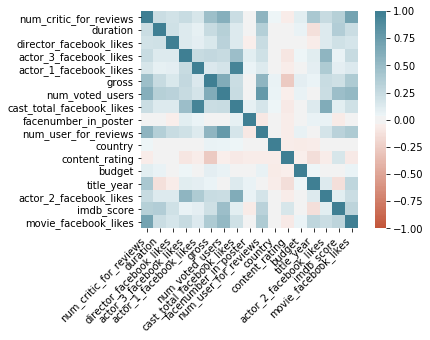

In [31]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Based on the heatmap, we can see some high correlations:
- "actor_1_facebook_like" is highly correlated with the "cast_total_facebook_likes"
- both "actor_2_facebook_like" and "actor_3_facebook_like" are also correlated to the "cast_total_facebook_likes"

Therefore, we will modify these columns into: "actor_1_facebook_like" and "other_actors_facebook_like" and remove other columns.

In [32]:
data["other_actor_facebook_likes"] = data["actor_3_facebook_likes"] + data["actor_2_facebook_likes"]

There are also high correlation between "num_critic_for_reviews" and "num_user_for_reviews". We will take the ratio of these variable and remove them.

In [33]:
data["review_ratio"] = data["num_critic_for_reviews"] / data["num_user_for_reviews"]

Let's drop 4 columns: "cast_total_facebook_likes", "actor_2_facebook_like", "actor_3_facebook_like", "num_critic_for_reviews", "num_user_for_reviews" and see how other variable's correlation now.

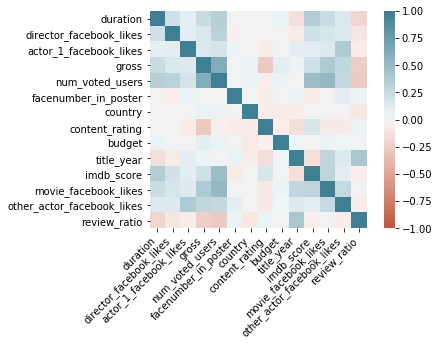

In [34]:
data = data.drop(["cast_total_facebook_likes","actor_3_facebook_likes",
                  "actor_2_facebook_likes","num_critic_for_reviews","num_user_for_reviews"], axis = 1)
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

It looks better and there is no high correlation between variables now.

Let's reorganize the dataset before splitting it into train and test set. In this project, we will only examine a simple classification for IMDB score. This classification will be based on feature set to predict whether the IMDB of the movie is below or above 7. Therefore, there is 2 labels:
- higher than 7 as 1
- equal or below 7 as 0

In [35]:
data["label"] = data["imdb_score"].apply(lambda x: 1 if x>7 else 0)
df = data[['title_year','country','duration', 'budget','gross',
          'review_ratio','num_voted_users','facenumber_in_poster','movie_facebook_likes',
          'director_facebook_likes','actor_1_facebook_likes','other_actor_facebook_likes',
          'label']]

Our working dataset now includes 12 features columns and the last column is the label.

In [36]:
df

,title_year,country,duration,budget,gross,review_ratio,num_voted_users,facenumber_in_poster,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,other_actor_facebook_likes,label
0,2009.0,1,178.0,237000000.0,760505847.0,0.236739,886204,0.0,33000.000000,793.408565,1000.000000,1791.000000,1
1,2007.0,1,169.0,300000000.0,309404152.0,0.243942,471220,0.0,9195.043615,563.000000,40000.000000,6000.000000,1
2,2015.0,2,148.0,245000000.0,200074175.0,0.605634,275868,1.0,85000.000000,793.408565,11000.000000,554.000000,0
3,2012.0,1,164.0,250000000.0,448130642.0,0.301000,1144337,0.0,164000.000000,22000.000000,27000.000000,46000.000000,1
4,2012.0,1,132.0,263700000.0,73058679.0,0.626016,212204,1.0,24000.000000,475.000000,640.000000,1162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801,2004.0,1,77.0,7000.0,424760.0,0.385445,72639,0.0,19000.000000,291.000000,291.000000,53.000000,0
3802,2005.0,0,80.0,7000.0,70071.0,1.000000,589,0.0,74.000000,793.408565,7640.344982,2731.580137,0
3803,1992.0,1,81.0,7000.0,2040920.0,0.430769,52055,0.0,9195.043615,793.408565,121.000000,26.000000,0
3804,2011.0,1,95.0,9000.0,4584.0,1.000000,1338,1.0,413.000000,793.408565,296.000000,338.000000,0


    6. Splitting dataset into training and testing set
In order to make the model training and test less sensitive to the scale of feature, we will normalize the data into range of 0,1.

In [37]:
#Make feature and label data
feature = df.iloc[:,:len(df.columns)-1].values
label = df["label"].values
#Normalizing the feature data
scaler = MinMaxScaler()
X = scaler.fit_transform(feature)
y = label
#split dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 5)

II. Implement model
    1. Linear Classification

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#create a result list to store all the model's score
result = []

classifier = LinearDiscriminantAnalysis()
classifier.fit(x_train, y_train)
print(f'Score of model is {classifier.score(x_test, y_test)}')
result.append(classifier.score(x_test, y_test))

Score of model is 0.7913385826771654


    2. K-Nearest Neighbors
In order to find the best K we will need to loop through a range of 100 and plot the score of model.

The best score of model is with k = 46 and score = 0.7926509186351706


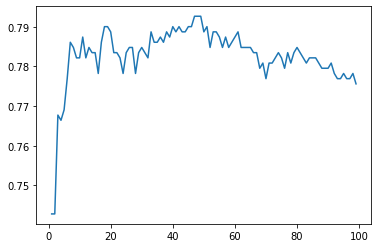

In [39]:
score = []
for k in range(1, 100):
    classifier = KNeighborsClassifier(n_neighbors = k, weights = "distance")
    classifier.fit(x_train, y_train)
    score.append(classifier.score(x_test, y_test))
print(f'The best score of model is with k = {score.index(max(score))} and score = {max(score)}')
plt.plot(range(1,100), score)
plt.show()
result.append(max(score))

    3. Logistic Classification

In [40]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
print(f'Score of model is {classifier.score(x_test, y_test)}')
result.append(classifier.score(x_test, y_test))

Score of model is 0.7834645669291339


    4. Support-Vector Classification

In [41]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train, y_train)
print(f'Score of model is {classifier.score(x_test, y_test)}')
result.append(classifier.score(x_test, y_test))

Score of model is 0.7821522309711286


    5. Decision Tree Classification

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
print(f'Score of model is {tree_model.score(x_test, y_test)}')
result.append(tree_model.score(x_test, y_test))

Score of model is 0.7664041994750657


    6. Random Forest Classification
With Random Forest Classification, in order to find the best parameters we need help from GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"n_estimators":(100, 200, 300, 400), "criterion":("gini", "entropy"), 
              "max_depth":(100,200,300), "min_samples_split":(100,200)}
classifier= RandomForestClassifier()
model = GridSearchCV(classifier, parameters)
model.fit(x_train, y_train)
model.best_params_

{'criterion': 'entropy',
 'max_depth': 200,
 'min_samples_split': 100,
 'n_estimators': 200}

Using these parameters to fit in our Random Forest Classification

In [44]:
classifier= RandomForestClassifier(criterion = "entropy", max_depth=300, min_samples_split = 100)
classifier.fit(x_train, y_train)
print(f'Score of model is {classifier.score(x_test, y_test)}')
result.append(classifier.score(x_test, y_test))

Score of model is 0.8188976377952756


III. Conclusion
Accuracy of each classification model is sumarized in below table.

In [45]:
model_list = ["Linear Classification", "K-Nearest Neighbors", "Logistic Classification","Support-Vector Classification","Decision Tree Classification", "Random Forest Classification"]
conclusion = pd.DataFrame(result, index = [model_list], columns = ["score"])
conclusion

,score
Linear Classification,0.791339
K-Nearest Neighbors,0.792651
Logistic Classification,0.783465
Support-Vector Classification,0.782152
Decision Tree Classification,0.766404
Random Forest Classification,0.818898


The most accuracy is Random Forest Classification with score of 0.81. Other classification models have the range of accuracy from 0.75 to 0.79 which is acceptable and reasonable. However, this project is only a simple classification case which need extend and approach further in the future.